# Lesson 3b: Manipulating data

> During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks are often reported to take up 80% or more of an analyst's time.
>
> \- Wes McKinney, the creator of Pandas, in his book *Python for Data Analysis*

We've learned how to subset our DataFrames, in this lesson we'll focus on how to manipulate, create, drop, even identify missing value patterns across our DataFrame's columns.

## Learning objectives

By the end of this lesson you will be able to:

- Rename columns
- Perform calculations and operations with one or more columns
- Add, drop, and overwrite columns in your DataFrame
- Identify missing values and replace these (and even non-missing) values.

## Renaming columns

Often, one of the first things we want to do with a new data set is clean up the column names. We can do this a few different ways and to illustrate, let's look at the Ames housing data:

In [1]:
import pandas as pd

ames = pd.read_csv('../data/ames_raw.csv')
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Say we want to rename the "MS SubClass" and "MS Zoning" columns. We can do so with the `rename` method and passing a dictionary that maps old names to new names: `df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'})`.

In [2]:
ames.rename(columns={'MS SubClass': 'ms_subclass', 'MS Zoning': 'ms_zoning'})
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Wait? What happened? Nothing changed? In the code above we did actually rename columns of our DataFrame but we didn’t modify the DataFrame inplace, we made a copy of it. There are generally two options for making permanent DataFrame changes:

1. Use the argument `inplace=True`, e.g., `df.rename(..., inplace=True)`, available in most Pandas functions/methods
2. Re-assign, e.g., `df = df.rename(...)` The Pandas team recommends **Method 2 (re-assign)**, for a [few reasons](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700) (mostly to do with how memory is allocated under the hood).

```{warning}
Be sure to include the `columns=` when providing the argument dictionary. `rename` can be used to rename index values as well, which is actually the default behavior. So if you don't specify `columns=` it'll behave differently then expected and no error/warning messages will be provided.
```

In [3]:
ames = ames.rename(columns={'MS SubClass': 'ms_subclass', 'MS Zoning': 'ms_zoning'})
ames.head()

,Order,PID,ms_subclass,ms_zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Using `rename` is great for renaming a single or even a handful of columns but can be tedious for renaming _many_ columns. For this we can use the `.columns` attribute, which just returns all the column names. 

In [4]:
ames.columns

Index(['Order', 'PID', 'ms_subclass', 'ms_zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

 Pandas offers a lot of string methods that we can apply to string objects.

```{tip}
Check out some of the more common string methods [here](https://pandas.pydata.org/docs/user_guide/text.html#string-methods).
```

We can manipulate these column name values by using string methods that you can access via `.str.xxxx()`. For example, we can coerce all the column names to lower case with:

In [5]:
ames.columns.str.lower()

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot frontage', 'lot area',
       'street', 'alley', 'lot shape', 'land contour', 'utilities',
       'lot config', 'land slope', 'neighborhood', 'condition 1',
       'condition 2', 'bldg type', 'house style', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'roof style',
       'roof matl', 'exterior 1st', 'exterior 2nd', 'mas vnr type',
       'mas vnr area', 'exter qual', 'exter cond', 'foundation', 'bsmt qual',
       'bsmt cond', 'bsmt exposure', 'bsmtfin type 1', 'bsmtfin sf 1',
       'bsmtfin type 2', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       'heating', 'heating qc', 'central air', 'electrical', '1st flr sf',
       '2nd flr sf', 'low qual fin sf', 'gr liv area', 'bsmt full bath',
       'bsmt half bath', 'full bath', 'half bath', 'bedroom abvgr',
       'kitchen abvgr', 'kitchen qual', 'totrms abvgrd', 'functional',
       'fireplaces', 'fireplace qu', 'garage type', 'garage yr blt',
      

We can even chain multiple string methods together. For example the following coerces the column names to lower case, replaces all white space in the column names with an underscore, and then assigns these converted values back to the `.columns` attribute.

In [6]:
ames.columns = ames.columns.str.lower().str.replace(" ", "_")
ames.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/jPWBtOIh6_8?si=Bxro1M4gKIC6dhVE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

## Calculations using columns

It's common to want to modify a column of a DataFrame, or sometimes even to create a new column. For example, let's look at the `saleprice` column in our data.

In [7]:
sale_price = ames['saleprice']
sale_price

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: saleprice, Length: 2930, dtype: int64

Say we wanted to convert the sales price of our homes to be represented as thousands; so rather than "215000" we want to represent it as "215"? To do this we can simply divide by 1,000.

In [8]:
sale_price_k = sale_price / 1000
sale_price_k

0       215.0
1       105.0
2       172.0
3       244.0
4       189.9
        ...  
2925    142.5
2926    131.0
2927    132.0
2928    170.0
2929    188.0
Name: saleprice, Length: 2930, dtype: float64

## Adding & removing columns

So we've create a new series, `sale_price_k`. Right now it's totally separate from our original `ames` DataFrame, but we can make it a column of `ames` using the assignment syntax with the column reference syntax.
```python
df['new_column_name'] = new_column_series
```

In [9]:
ames['sale_price_k'] = sale_price_k
ames.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,sale_price_k
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,215.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,105.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,172.0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,244.0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,189.9


Note that `ames` now has a "sale_price_k" column at the end.

```{note}
Also note that in the code above, the column name goes in quotes within the bracket syntax, while the values that will become the column -- the Series we're using -- are on the right side of the statement, without any brackets or quotes.
```

This sequence of operations can be expressed as a single line:

In [10]:
ames['sale_price_k'] = ames['saleprice'] / 1000

From a mathematical perspective, what we're doing here is adding a *scalar* -- a single value -- to a *vector* -- a series of values (aka a `Series`).
Other vector-scalar math is supported as well.

In [11]:
# Subtraction
(ames['saleprice']- 12).head()

0    214988
1    104988
2    171988
3    243988
4    189888
Name: saleprice, dtype: int64

In [12]:
# Multiplication
(ames['saleprice'] * 10).head()

0    2150000
1    1050000
2    1720000
3    2440000
4    1899000
Name: saleprice, dtype: int64

In [13]:
# Exponentiation
(ames['saleprice'] ** 2).head()

0    46225000000
1    11025000000
2    29584000000
3    59536000000
4    36062010000
Name: saleprice, dtype: int64

We may want to drop columns as well. For this we can use the `.drop()` method:

In [14]:
ames = ames.drop(columns=['order', 'sale_price_k'])
ames.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Knowledge check

```{admonition} Question:
:class: attention
1. Create a new column `utility_space` that is 1/5 of the above ground living space (`gr_liv_area`). 
2. You will get fractional output with step #1. See if you can figure out how to round this output to the nearest integer.
3. Now remove this column from your DataFrame
```

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/9ZKoOjCnxhc?si=KGWb3l9HjvBWjCf2" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

## Overwriting columns


What if we discovered a systematic error in our data? Perhaps we find out that the "lot_area" column is not entirely accurate because the recording process includes an extra 50 square feet for every property. We could create a new column, "real_lot_area" but we're not going to need the original "lot_area" column, and leaving it could cause confusion for others looking at our data.

A better solution would be to replace the original column with the new, recalculated, values. We can do so using the same syntax as for creating a new column.

In [15]:
ames.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
# Subtract 50 from lot area, and then overwrite the original data.
ames['lot_area'] = ames['lot_area'] - 50

In [17]:
ames.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11572,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14217,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11110,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Calculating based on multiple columns

So far we've only seen vector-scalar math. But vector-vector math is supported as well. Let's look at a toy example of creating a column that contains the price per square foot.

In [18]:
price_per_sqft = ames['saleprice'] / ames['gr_liv_area']
price_per_sqft.head()

0    129.830918
1    117.187500
2    129.420617
3    115.639810
4    116.574586
dtype: float64

In [19]:
ames['price_per_sqft'] = price_per_sqft
ames.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,price_per_sqft
0,526301100,20,RL,141.0,31720,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,129.830918
1,526350040,20,RH,80.0,11572,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,117.187500
2,526351010,20,RL,81.0,14217,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,129.420617
3,526353030,20,RL,93.0,11110,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,115.639810
4,527105010,60,RL,74.0,13780,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,116.574586


You can combine vector-vector and vector-scalar calculations in arbitrarily complex ways.

In [20]:
ames['nonsense'] = (ames['yr_sold'] + 12) * ames['gr_liv_area'] + ames['lot_area'] - 50
ames.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,price_per_sqft,nonsense
0,526301100,20,RL,141.0,31720,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,215000,129.830918,3380102
1,526350040,20,RH,80.0,11572,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,117.187500,1823234
2,526351010,20,RL,81.0,14217,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,129.420617,2701405
3,526353030,20,RL,93.0,11110,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,244000,115.639810,4277480
4,527105010,60,RL,74.0,13780,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,116.574586,3307568


### Knowledge check

```{admonition} Question:
:class: attention
Create a new column `price_per_total_sqft` that is `saleprice` divided by the sum of `gr_liv_area`, `total_bsmt_sf`, `wood_deck_sf`, `open_porch_sf`.
```

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/Mylku84SjbM?si=9QRNCSD9NppqKgRK" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

## Non-numeric column operations

For simplicity, we started with mathematical operations. However, pandas supports string operations as well. We can use `+` to concatenate strings, with both vectors and scalars.

In [21]:
'Home in ' + ames['neighborhood'] + ' neighborhood sold under ' + ames['sale_condition'] + ' condition'

0       Home in NAmes neighborhood sold under Normal c...
1       Home in NAmes neighborhood sold under Normal c...
2       Home in NAmes neighborhood sold under Normal c...
3       Home in NAmes neighborhood sold under Normal c...
4       Home in Gilbert neighborhood sold under Normal...
                              ...                        
2925    Home in Mitchel neighborhood sold under Normal...
2926    Home in Mitchel neighborhood sold under Normal...
2927    Home in Mitchel neighborhood sold under Normal...
2928    Home in Mitchel neighborhood sold under Normal...
2929    Home in Mitchel neighborhood sold under Normal...
Length: 2930, dtype: object

More complex string operations are possible using methods available through the `.str` *accessor*.


```{tip}
We won't cover them in detail, so refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) if you're interested. But realize that we can do _many_ different manipulations with string columns and its worth taking time to familiarize yourself with Pandas string capabilities.
```

In [22]:
# number of characters in string
ames['neighborhood'].str.len()

0       5
1       5
2       5
3       5
4       7
       ..
2925    7
2926    7
2927    7
2928    7
2929    7
Name: neighborhood, Length: 2930, dtype: int64

In [23]:
ames['garage_type'].str.lower().str.replace('tchd', 'tached')

0       attached
1       attached
2       attached
3       attached
4       attached
          ...   
2925    detached
2926    attached
2927         NaN
2928    attached
2929    attached
Name: garage_type, Length: 2930, dtype: object

## More Complex Column Manipulation

### Replacing Values

One fairly common situation in data wrangling is needing to convert one set of values to another, where there is a one-to-one correspondence between the values currently in the column and the new values that should replace them.
This operation can be described as "mapping one set of values to another".

Let's look at an example of this. In our Ames data the month sold is represented numerically:

In [24]:
ames['mo_sold'].head()

0    5
1    6
2    6
3    4
4    3
Name: mo_sold, dtype: int64

Suppose we want to change this so that values are represented by the month name:

- 1 = 'Jan'
- 2 = 'Feb'
- ...
- 12 = 'Dec'

We can express this *mapping* of old values to new values using a Python dictionary.

In [25]:
# Only specify the values we want to replace; don't include the ones that should stay the same.
value_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
    }

Pandas provides a handy method on Series, `.replace`, that accepts this value mapping and updates the Series accordingly.
We can use it to recode our values.

In [26]:
ames['mo_sold'].replace(value_mapping).head()

0    May
1    Jun
2    Jun
3    Apr
4    Mar
Name: mo_sold, dtype: object

If you are a SQL user, this workflow may look familiar to you;
it's quite similar to a `CASE WHEN` statement in SQL.

### Missing values

Missing values are typically denoted with NaN. We can use `df.isnull()` to find missing values in a dataframe. It returns a boolean for each element in the dataframe:

In [27]:
ames.isnull()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,price_per_sqft,nonsense
0,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False


We can use this to easily compute the total number of missing values in each column:

In [28]:
ames.isnull().sum()

pid                 0
ms_subclass         0
ms_zoning           0
lot_frontage      490
lot_area            0
                 ... 
sale_type           0
sale_condition      0
saleprice           0
price_per_sqft      0
nonsense            0
Length: 83, dtype: int64

Recall we also get this information with `.info()`. Actually, we get the inverse as `.info()` tells us how many non-null values exist in each column.

In [29]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2930 non-null   int64  
 1   ms_subclass      2930 non-null   int64  
 2   ms_zoning        2930 non-null   object 
 3   lot_frontage     2440 non-null   float64
 4   lot_area         2930 non-null   int64  
 5   street           2930 non-null   object 
 6   alley            198 non-null    object 
 7   lot_shape        2930 non-null   object 
 8   land_contour     2930 non-null   object 
 9   utilities        2930 non-null   object 
 10  lot_config       2930 non-null   object 
 11  land_slope       2930 non-null   object 
 12  neighborhood     2930 non-null   object 
 13  condition_1      2930 non-null   object 
 14  condition_2      2930 non-null   object 
 15  bldg_type        2930 non-null   object 
 16  house_style      2930 non-null   object 
 17  overall_qual  

We can use `any()` to identify which columns have missing values. We can use this information for various reasons such as subsetting for just those columns that have missing values.

In [30]:
missing = ames.isnull().any() # identify if missing values exist in each column
ames[missing[missing].index]  # subset for just those columns that have missing values

,lot_frontage,alley,mas_vnr_type,mas_vnr_area,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,...,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,pool_qc,fence,misc_feature
0,141.0,NaN,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,...,Attchd,1960.0,Fin,2.0,528.0,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,TA,TA,No,Rec,468.0,LwQ,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN
2,81.0,NaN,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,...,Attchd,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2
3,93.0,NaN,None,0.0,TA,TA,No,ALQ,1065.0,Unf,...,Attchd,1968.0,Fin,2.0,522.0,TA,TA,NaN,NaN,NaN
4,74.0,NaN,None,0.0,Gd,TA,No,GLQ,791.0,Unf,...,Attchd,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,NaN,None,0.0,TA,TA,Av,GLQ,819.0,Unf,...,Detchd,1984.0,Unf,2.0,588.0,TA,TA,NaN,GdPrv,NaN
2926,NaN,NaN,None,0.0,Gd,TA,Av,BLQ,301.0,ALQ,...,Attchd,1983.0,Unf,2.0,484.0,TA,TA,NaN,MnPrv,NaN
2927,62.0,NaN,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed
2928,77.0,NaN,None,0.0,Gd,TA,Av,ALQ,1071.0,LwQ,...,Attchd,1975.0,RFn,2.0,418.0,TA,TA,NaN,NaN,NaN


When you have missing values, we usually either drop them or impute them.You can drop missing values with `.dropna()`:

In [31]:
ames.dropna()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,price_per_sqft,nonsense


Whoa! What just happened? Well, this data set actually has a missing value in every single row. `.dropna()` drops every row that contains a missing value so we end up dropping _all_ observations.  Consequently, we probably want to figure out what's going on with these missing values and isolate the column causing the problem and imputing the values if possible.

```{tip}
Another "drop" method is `.drop_duplcates()` which will drop duplicated rows in your DataFrame.
```


Sometimes visualizations help identify patterns in missing values. One thing I often do is print a heatmap of my dataframe to get a feel for where my missing values are. We'll get into data visualization in future lessons but for now here is an example using the **searborn** library. We can see that several variables have a lot of missing values (`alley`, `fireplace_qu`, `pool_qc`, `fence`, `misc_feature`).

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

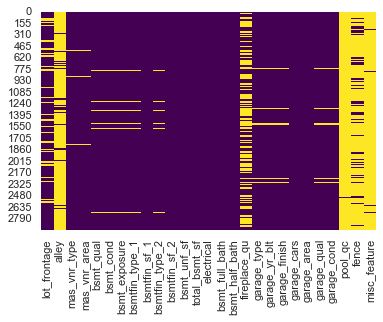

In [33]:
ames_missing = ames[missing[missing].index]
sns.heatmap(ames_missing.isnull(), cmap='viridis', cbar=False);

Since we can't drop all missing values in this data set (since it leaves us with no rows), we need to impute ("fill") them in. There are several approaches we can use to do this; one of which uses the `.fillna()` method. This method has various options for filling, you can use a fixed value, the mean of the column, the previous non-nan value, etc:

In [34]:
import numpy as np

# example DataFrame with missing values
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [35]:
df.fillna(0)  # fill with 0

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [36]:
df.fillna(df.mean())  # fill with the mean

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [37]:
df.fillna(method='bfill')  # backward (upwards) fill from non-nan values

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [38]:
df.fillna(method='ffill')  # forward (downward) fill from non-nan values

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


### Applying custom functions

There will be times when you want to apply a function that is not built-in to Pandas. For this, we have methods:

* `df.apply()`, applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)
* `df.applymap()`, applies a function element-wise (for functions that accept/return single values at a time)
* `series.apply()`/`series.map()`, same as above but for Pandas series

For example, say you had the following custom function that defines if a home is considered a luxery home simply based on the price sold.

```{note}
Don't worry, you'll learn more about writing your own functions in future lessons!
```

In [39]:
def is_luxery_home(x):
    if x > 500000:
        return 'Luxery'
    else:
        return 'Non-luxery'

ames['saleprice'].apply(is_luxery_home)

0       Non-luxery
1       Non-luxery
2       Non-luxery
3       Non-luxery
4       Non-luxery
           ...    
2925    Non-luxery
2926    Non-luxery
2927    Non-luxery
2928    Non-luxery
2929    Non-luxery
Name: saleprice, Length: 2930, dtype: object

This may have been better as a lambda function, which is just a shorter approach to writing functions. This may be a bit confusing but we'll talk more about lambda functions in the writing functions lesson. For now, just think of it as being able to write a function for single use application on the fly.

In [40]:
ames['saleprice'].apply(lambda x: 'Luxery' if x > 500000 else 'Non-luxery')

0       Non-luxery
1       Non-luxery
2       Non-luxery
3       Non-luxery
4       Non-luxery
           ...    
2925    Non-luxery
2926    Non-luxery
2927    Non-luxery
2928    Non-luxery
2929    Non-luxery
Name: saleprice, Length: 2930, dtype: object

You can even use functions that require additional arguments. Just specify the arguments in `.apply()`:

In [41]:
def is_luxery_home(x, price):
    if x > price:
        return 'Luxery'
    else:
        return 'Non-luxery'

ames['saleprice'].apply(is_luxery_home, price=200000)

0           Luxery
1       Non-luxery
2       Non-luxery
3           Luxery
4       Non-luxery
           ...    
2925    Non-luxery
2926    Non-luxery
2927    Non-luxery
2928    Non-luxery
2929    Non-luxery
Name: saleprice, Length: 2930, dtype: object

Sometimes we may have a function that we want to apply to every element across multiple columns. For example, say we wanted to convert several of the square footage variables to be represented as square meters. For this we can use the [`.applymap()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html) method.

In [42]:
def convert_to_sq_meters(x):
    return x*0.092903

ames[['gr_liv_area', 'garage_area', 'lot_area']].applymap(convert_to_sq_meters)

,gr_liv_area,garage_area,lot_area
0,153.847368,49.052784,2946.883160
1,83.241088,67.819190,1075.073516
2,123.468087,28.985736,1320.801951
3,196.025330,48.495366,1032.152330
4,151.338987,44.779246,1280.203340
...,...,...,...
2925,93.181709,54.626964,732.725961
2926,83.798506,44.965052,820.798005
2927,90.115910,0.000000,965.355073
2928,129.042267,38.833454,925.313880


## Exercises

```{admonition} Questions:
:class: attention
1. Import the heart.csv dataset.
2. Are there any missing values in this data? If so, which columns? For these columns, fill the missing values with the value that appears most often (aka "mode"). This is a multi-step process and it would be worth reviewing the [`.fillna()` docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).
3. Create a new column called `risk` that is equal to $ \frac{age}{\text{res_bp} + chol + \text{max_hr}} $
4. Replace the values in the `rest_ecg` column so that:
   - normal = normal
   - left ventricular hypertrophy = lvh
   - ST-T wave abnormality = stt_wav_abn
```

## Computing environment

In [43]:
%load_ext watermark
%watermark -v -p jupyterlab,pandas,numpy,seaborn

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

jupyterlab: 3.3.2
pandas    : 1.4.2
numpy     : 1.22.4
seaborn   : 0.11.2

